In [3]:
import pandas as pd
import numpy as np
from numpy import abs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [4]:
data=pd.read_csv('winedata.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


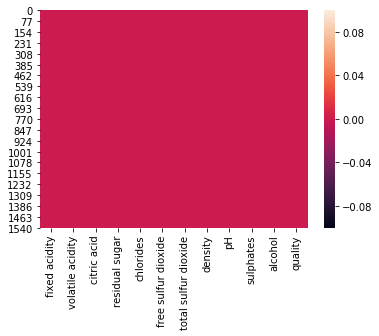

In [4]:
sns.heatmap(data.isnull())

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

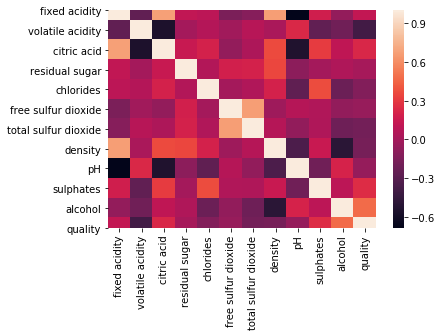

In [6]:
sns.heatmap(data.corr())

In [5]:
data.drop('volatile acidity',axis=1,inplace=True)

In [6]:
from scipy.stats import zscore
dt=abs(zscore(data))
print(dt.shape)
dt_new=data.loc[(dt<3).all(axis=1)]
print(dt_new.shape)

(1599, 11)
(1458, 11)


In [7]:
dt_new.skew()

fixed acidity           0.827264
citric acid             0.297781
residual sugar          2.457646
chlorides               2.288587
free sulfur dioxide     0.873162
total sulfur dioxide    1.183539
density                 0.061110
pH                      0.109577
sulphates               0.891997
alcohol                 0.754976
quality                 0.400875
dtype: float64

In [8]:
for i in dt_new.columns:
        if dt_new.skew().loc[i]>0.55:
            dt_new[i]=np.log(dt_new[i])

In [9]:
dt_new.skew()

fixed acidity           0.379717
citric acid             0.297781
residual sugar          1.227323
chlorides               0.525450
free sulfur dioxide    -0.302182
total sulfur dioxide   -0.094206
density                 0.061110
pH                      0.109577
sulphates               0.343137
alcohol                 0.587917
quality                 0.400875
dtype: float64

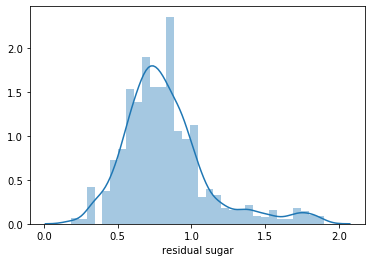

In [10]:

sns.distplot(dt_new['residual sugar'])

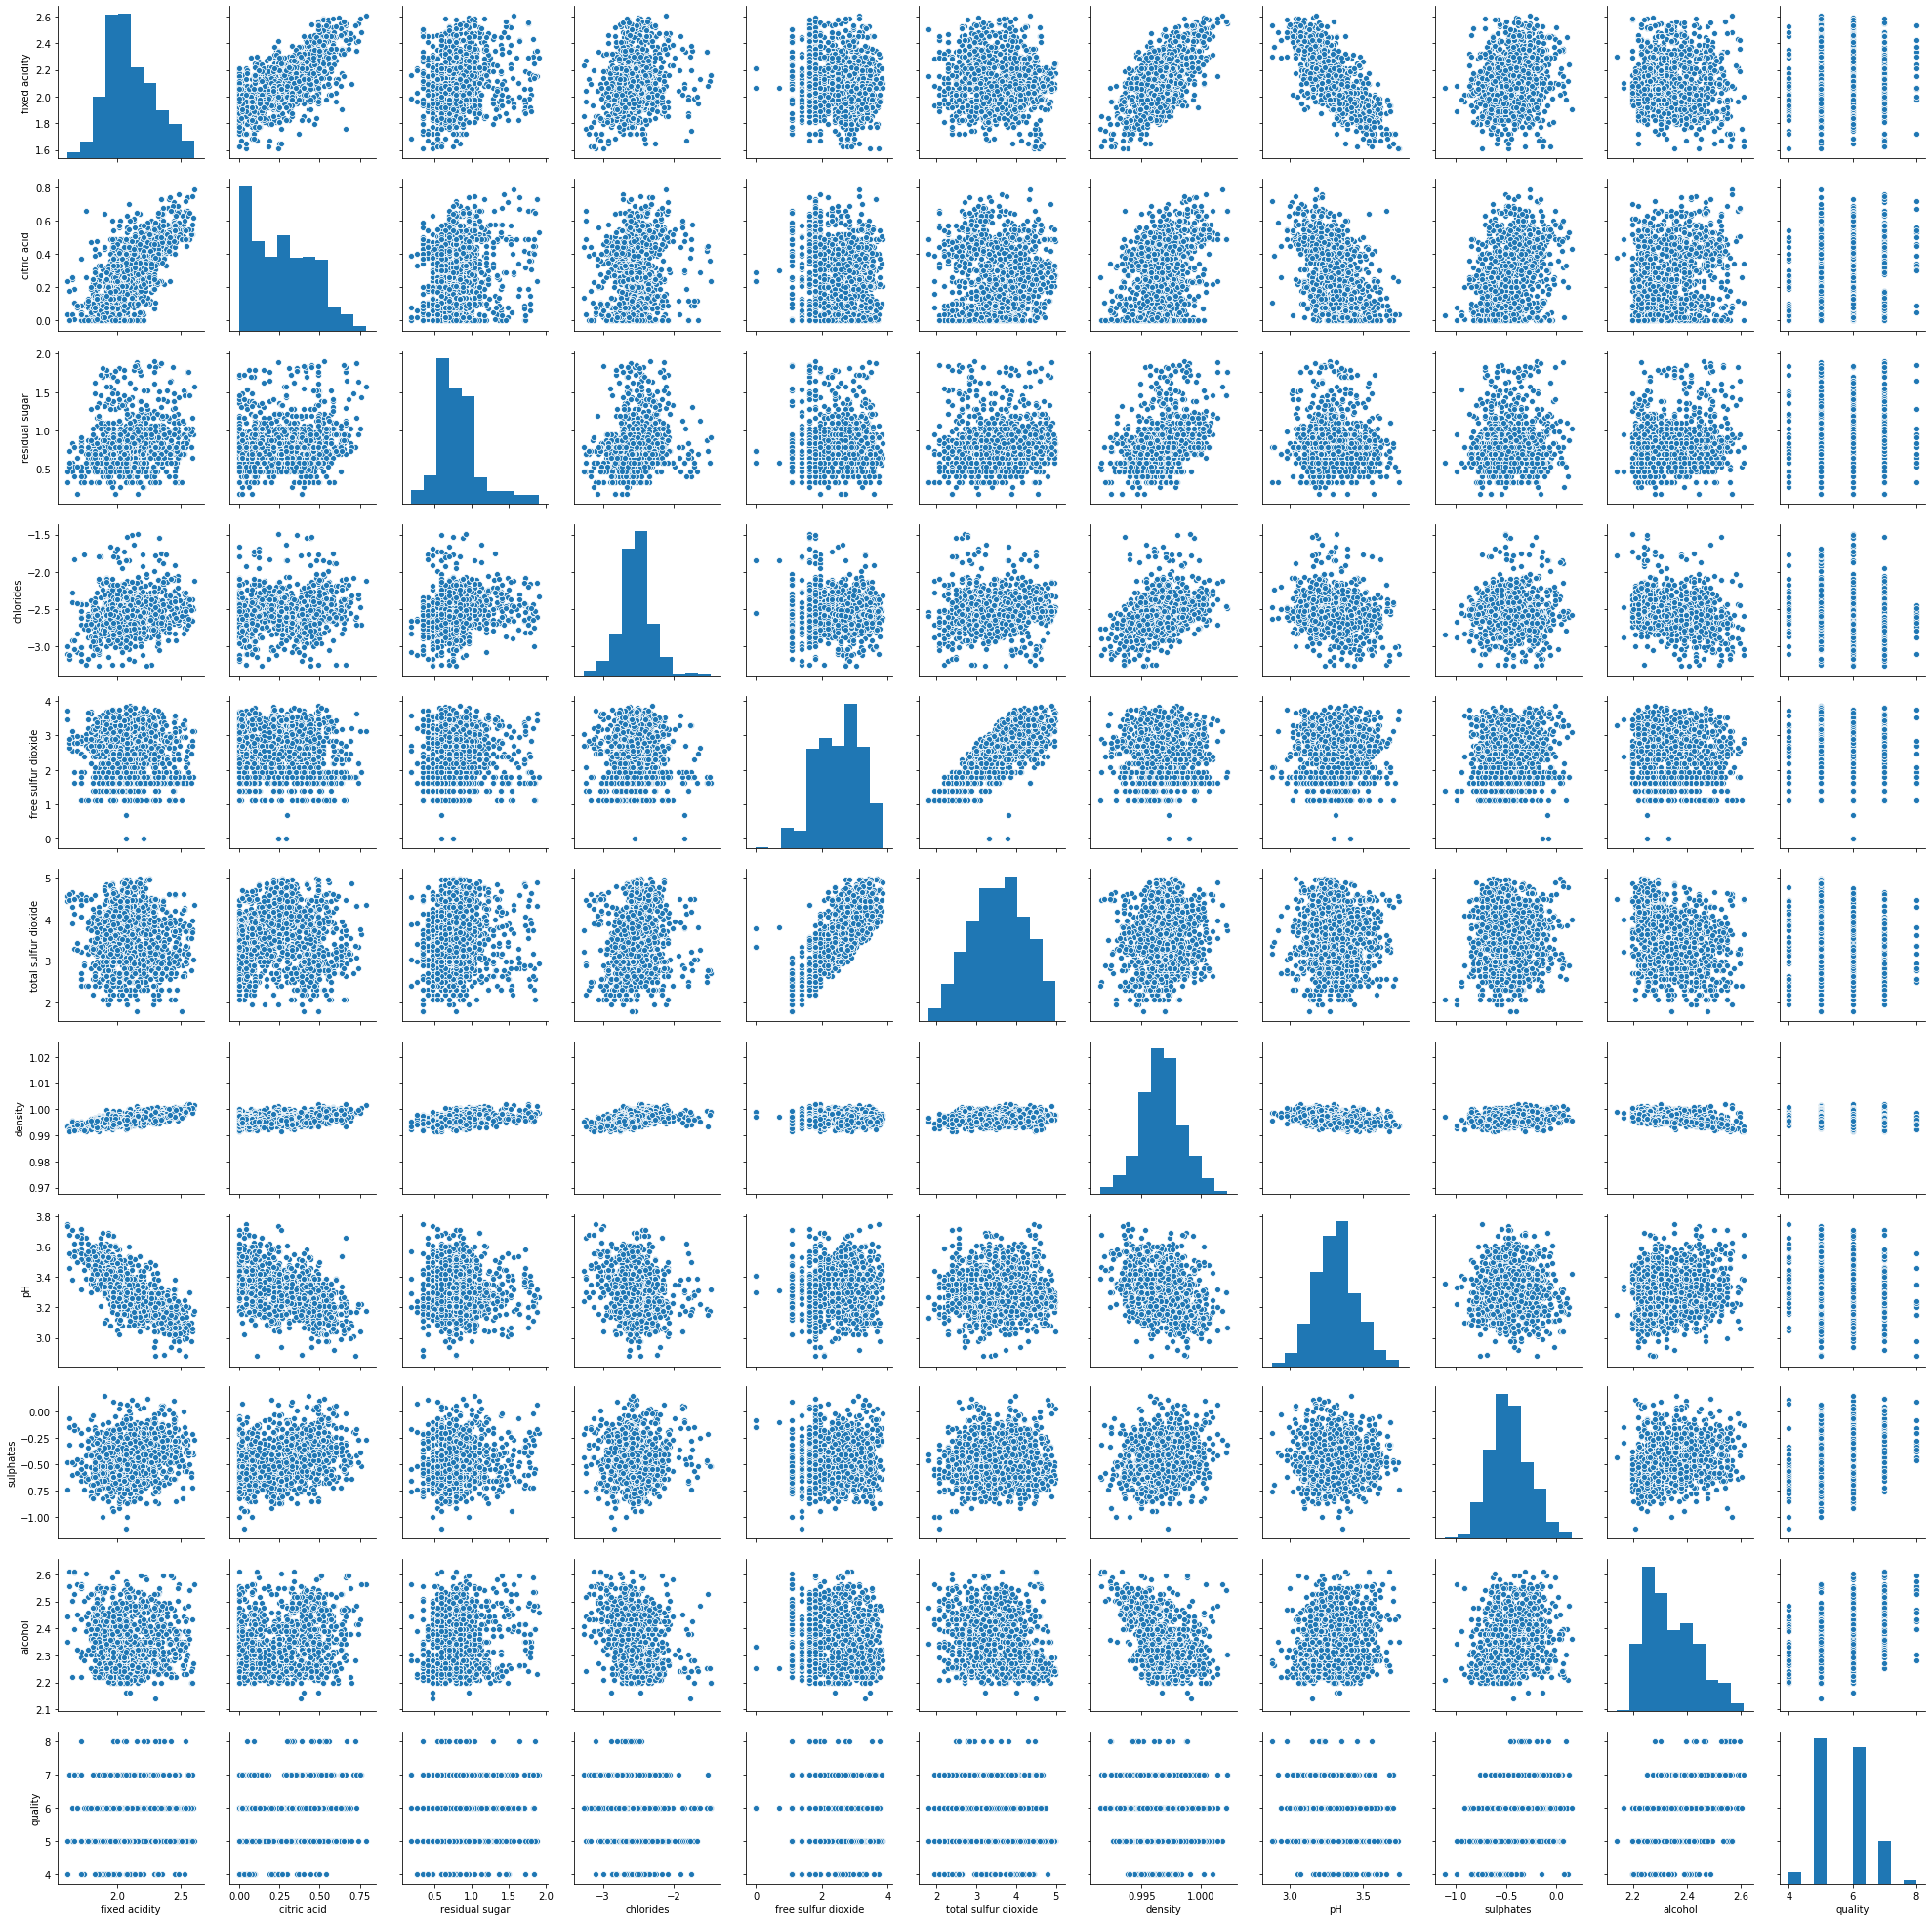

In [13]:
sns.pairplot(dt_new)

In [11]:
dt_x=dt_new.drop(columns=['quality','residual sugar'])
y=dt_new[['quality']]

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dt_x)
x=pd.DataFrame(x,columns=dt_x.columns)

In [13]:
x.skew()

fixed acidity           0.379717
citric acid             0.297781
chlorides               0.525450
free sulfur dioxide    -0.302182
total sulfur dioxide   -0.094206
density                 0.061110
pH                      0.109577
sulphates               0.343137
alcohol                 0.587917
dtype: float64

In [14]:
print(y.shape)
print(x.shape)


(1458, 1)
(1458, 9)


In [15]:
from sklearn.metrics import mean_squared_error,r2_score
max_rscore=0

for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    if r2scr>max_rscore:
        max_rscore=r2scr
        final_state=r
print("maxrscr for",final_state,'is',max_rscore)

from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5).mean()


maxrscr for 81 is 0.4138708075057076


0.3104829554330524

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
max_rscore=0

for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.30)
    dst=DecisionTreeRegressor()
    dst.fit(x_train,y_train)
    y_pred=dst.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    if r2scr>max_rscore:
        max_rscore=r2scr
        final_state=r
print(dst.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("maxrscr for",final_state,'is',max_rscore)

from sklearn.model_selection import cross_val_score
print(cross_val_score(dst,x,y,cv=5).mean())

1.0
0.6118721461187214
[[  2   8   8   2   0]
 [  5 127  46   2   1]
 [  4  40 107  18   7]
 [  0  10  13  31   5]
 [  0   0   1   0   1]]
              precision    recall  f1-score   support

           4       0.18      0.10      0.13        20
           5       0.69      0.70      0.69       181
           6       0.61      0.61      0.61       176
           7       0.58      0.53      0.55        59
           8       0.07      0.50      0.12         2

    accuracy                           0.61       438
   macro avg       0.43      0.49      0.42       438
weighted avg       0.62      0.61      0.61       438

maxrscr for 88 is 0.1574318985950327
-0.43597478765840003


In [17]:
from sklearn.metrics import mean_squared_error,r2_score
max_rscore=0

for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.30)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    if r2scr>max_rscore:
        max_rscore=r2scr
        final_state=r
print("maxrscr for",final_state,'is',max_rscore)
print(kn.score(x_train,y_train))



from sklearn.model_selection import cross_val_score
print(cross_val_score(kn,x,y,cv=5).mean())

maxrscr for 59 is 0.4137603068072865
0.5049880400047715
0.1546471376800727


In [18]:
def maxscore(reg,x,y):
    max_score=0
    for r in range (45,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2scr=r2_score(y_test,y_pred)
        if r2scr>max_score:
            max_score=r2scr
            final=r
    print("max_r2score for",final,'is',max_score)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [20]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print('cors_val_score mean:',cross_val_score(gbr,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(gbr,x,y,cv=5).std())

cors_val_score mean: 0.33641825497850764
cors_val_score std: 0.052941367218389664


In [21]:
r=maxscore(gbr,x,y)

max_r2score for 68 is 0.46819271805458784


In [22]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [36]:
adb=AdaBoostRegressor(learning_rate=1,n_estimators=100)
print('cors_val_score mean:',cross_val_score(adb,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(adb,x,y,cv=5).std())

cors_val_score mean: 0.2917422535490232
cors_val_score std: 0.08225507552902364


In [23]:
r=maxscore(adb,x,y)

max_r2score for 99 is 0.4602894541988819


In [24]:
from sklearn.externals import joblib
joblib.dump(gbr,'wine.pk1')

['wine.pk1']